In [97]:
%matplotlib inline
import networkx as nx
import pandas as pd

In [98]:
df = pd.read_json('data/movies-1998.json')
df

,productId,userId,profileName,helpfulness,score,time,summary,text,year,month,day
2987,B000056PNV,AL338KNXJC418,Tracy E. Blackstone,99/107,5,911347200000,One Of The Two Best Samurai Films Ever Made!,This film is one of the two best Samurai films...,1998,11,18
5076,6304179499,A3ANE5SI99F1EY,riteclik@riteclik.com,7/8,5,915062400000,Don't Overlook This One.,The Turkey-Day special is often forgotten abou...,1998,12,31
6353,B00004RXMK,A3HNUJ8AKANQ3,"G. McAlmon ""ElpasoGeo""",0/1,5,912729600000,A poetic &amp; hilarious homage.,A poetic &amp; hilarious homage to silent Germ...,1998,12,4
6942,6305074054,A1GWS7GT9RXZMQ,SUNBOY473@aol.com,0/1,4,913075200000,Who says a &quot;Man&quot; can be Super?!,This movie is for everyone! It makes you wish ...,1998,12,8
9675,6304091338,A1268ZX3HDYDSH,editricks@aol.com,2/8,1,912556800000,"If you need an excuse to see frontal nudity, t...",This is a repellent story about an impoverishe...,1998,12,2
...,...,...,...,...,...,...,...,...,...,...,...
7907495,B0049MFTYM,A1GWS7GT9RXZMQ,SUNBOY473@aol.com,1/3,3,913334400000,What was so frightening about this?!,I thought this movie ver much draged. I know i...,1998,12,11
7907875,B00004CI13,A25W58TZK09YET,Charles Culbertson (cculbert@cfw.com),7/8,4,891561600000,Last Hurrah for a Fading Actor,"In certain scenes, you can see the weariness i...",1998,4,3
7908873,6304819927,AAHNPLJ1L109Y,Matt Martinez,0/3,2,895449600000,Dawn of the Dull,Zombie is basically a cheap knock-off of the u...,1998,5,18
7910497,B000059TGF,AJLX7HEHU0ZNV,dawn@wyoming.com,15/15,4,913161600000,A tender love story in a troubled place and di...,This is a powerful tale of a love that emerged...,1998,12,9


In [99]:
df_relevant_cols = df[['productId', 'userId']]
df_relevant_cols

,productId,userId
2987,B000056PNV,AL338KNXJC418
5076,6304179499,A3ANE5SI99F1EY
6353,B00004RXMK,A3HNUJ8AKANQ3
6942,6305074054,A1GWS7GT9RXZMQ
9675,6304091338,A1268ZX3HDYDSH
...,...,...
7907495,B0049MFTYM,A1GWS7GT9RXZMQ
7907875,B00004CI13,A25W58TZK09YET
7908873,6304819927,AAHNPLJ1L109Y
7910497,B000059TGF,AJLX7HEHU0ZNV


In [100]:
edgelist_df = df_relevant_cols.copy(deep=True).merge(df_relevant_cols,
                                                     how='inner',
                                                     on='productId',
                                                     suffixes=['_left', '_right'])
edgelist_df = edgelist_df.where(edgelist_df['userId_left'] < edgelist_df['userId_right']).dropna()

edgelist_df['weight'] = edgelist_df.groupby(['userId_left', 'userId_right']).transform('count')

edgelist_df

,productId,userId_left,userId_right,weight
12,6304972857,A11HVIMRI70E2U,A1PB43SUGAJK2Z,10
17,B000VULA9E,A1RU1MPA34NLZY,A3OI2DQP6HX7XM,12
25,B00004CZRQ,A1ZHGBT8ZB5VZ9,AKTYY529OHLMT,29
30,B00004CZRQ,A1GWS7GT9RXZMQ,A1ZHGBT8ZB5VZ9,29
31,B00004CZRQ,A1GWS7GT9RXZMQ,AKTYY529OHLMT,29
...,...,...,...,...
6735,B000IONJH4,A10X1LTUUTKGHE,A315ON89F3RRO,17
6741,6302482712,A2CB72DOQEDDRR,A7ROXXUYPHRS9,6
6747,B0049MFTYM,A1ZHGBT8ZB5VZ9,AKTYY529OHLMT,29
6752,B0049MFTYM,A1GWS7GT9RXZMQ,A1ZHGBT8ZB5VZ9,29


In [101]:
G: nx.Graph = nx.from_pandas_edgelist(edgelist_df,
                            source='userId_left',
                            target='userId_right',
                            edge_attr=['weight'])

In [102]:
G.get_edge_data('A1ZHGBT8ZB5VZ9', 'AKTYY529OHLMT')

{'weight': 29}

In [103]:
G.number_of_nodes()

158

In [104]:
G.number_of_edges()

97

In [128]:
nx.write_gexf(G, 'generated_graphs/reviewed_same_movie.gexf')

In [126]:
pos = nx.circular_layout(G)

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 3).

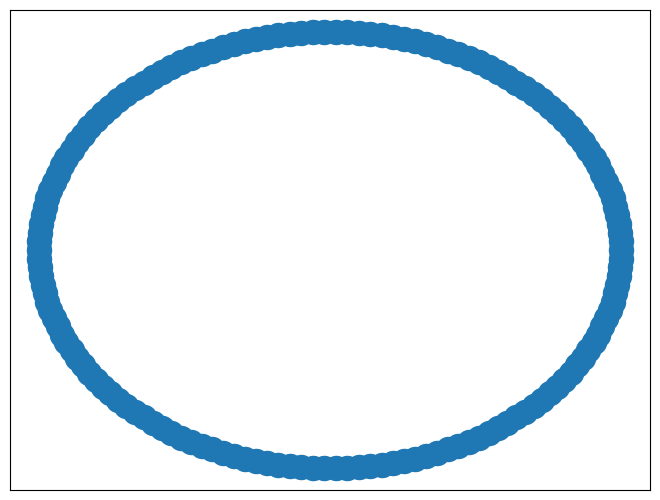

In [127]:
nx.draw(G, pos=pos)